# Import library

In [4]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

# Load dataset

In [5]:
boston = load_boston()
X = boston.data
y = boston.target
feature_names = list(boston.feature_names) + ['TARGET']

In [6]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
df = pd.DataFrame(np.concatenate((X, y.reshape(-1,1)), axis=1), columns=feature_names)

# Statistic data
* Head sample
* Describe dataset
* Correlation dataset for target

In [8]:
display(df.head())
display(df.describe())
display(df.corr().loc[['TARGET']])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
TARGET,-0.385832,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


# View relationship between variables

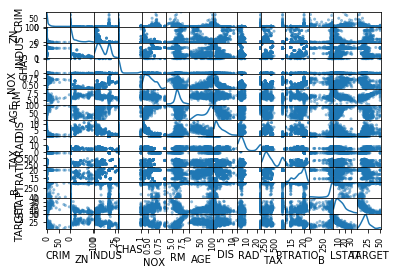

In [9]:
scatter_matrix(df, diagonal='kde')
plt.show()

# Visual Linear Regression

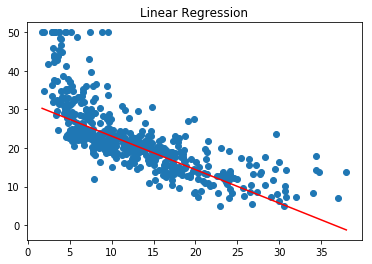

In [10]:
x_s = df['LSTAT'].values.reshape(-1,1)
y_s = df['TARGET'].values
linear_estimator = RANSACRegressor()
linear_estimator.fit(x_s, y_s)
x_axis = np.linspace(x_s.min(), x_s.max(), 100).reshape(-1,1)
y_axis = linear_estimator.predict(x_axis)
plt.title('Linear Regression')
plt.scatter(x_s.reshape(-1), y_s)
plt.plot(x_axis, y_axis, c='red')
plt.show()

# Visual Polynomial Regression with degree = 4

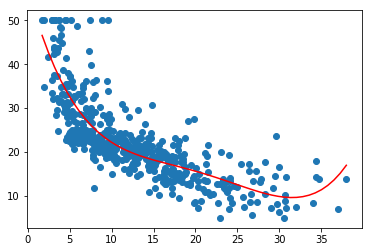

In [11]:
x_s = df['LSTAT'].values.reshape(-1,1)
y_s = df['TARGET'].values
steps = [
    ('poly', PolynomialFeatures(degree=4)),
    ('estimator', LinearRegression())
]
pipe = Pipeline(steps)
pipe.fit(x_s, y_s)
x_axis = np.linspace(x_s.min(), x_s.max()).reshape(-1,1)
y_axis = pipe.predict(x_axis)
plt.scatter(x_s.reshape(-1), y_s)
plt.plot(x_axis, y_axis, c='red')
plt.show()

# Introduction to Regression Spline
[Link Article](https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/)

In [12]:
data = df['LSTAT'].values.reshape(-1)
target = df['TARGET'].values.reshape(-1)
df_cuts, bins = pd.cut(data, bins=4, retbins=True, right=True)
df_cuts.value_counts()

(1.694, 10.79]    243
(10.79, 19.85]    187
(19.85, 28.91]     57
(28.91, 37.97]     19
dtype: int64

In [13]:
df_steps = pd.concat([data, df_cuts, target], keys=['LSTAT', 'LSTAT_CUT', 'TARGET'], axis=1)
df_steps.head(10)

TypeError: cannot concatenate object of type "<type 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [ ]:
df_steps_dumies = pd.get_dummies(df_cuts)
df_steps_dumies.head()

In [ ]:
fit = sm.GLM(df_steps.LSTAT, df_steps_dumies).fit()

In [ ]:
xp = np.linspace(simple_df.LSTAT.min(), simple_df.LSTAT.max(), 70)
bin_mapping = np.digitize(xp, bins)
x_val = pd.get_dummies(bin_mapping)
pred2 = fit.predict(x_val)
plt.scatter(df.LSTAT, df.TARGET)
plt.plot(x_val, pred2, c='red')
plt.show()

# 2D BSpline Regression with Scikitlearn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as si
import itertools
from sklearn.base import TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RANSACRegressor,\
                                 TheilSenRegressor, HuberRegressor


def main():
    # generate test data
    npoints = 1000
    x = np.random.uniform(low=-1., high=1., size=npoints)
    y = np.random.uniform(low=-1., high=1., size=npoints)
    z = np.exp(-0.5 * (x**2 + y**2))

    # add outliers
    z_noise = np.random.uniform(low=0., high=1., size=npoints)
    mask_good = z_noise < 0.9
    z_noise[mask_good] = 0.
    z_noise *= 10
    z += z_noise

    # prepare BSpline Basis
    knotsx = np.linspace(-1, 1., 5)
    knotsy = np.linspace(-1, 1., 5)
    knots = np.array([knotsx, knotsy])
    bspline_features = BSpline2DFeatures(knots)

    # prepare grid for prediction
    x1d = np.linspace(-1., 1., 100)
    y1d = np.linspace(-1., 1., 100)
    extent = x1d[0], x1d[-1], y1d[0], y1d[-1]
    xgrid, ygrid = np.meshgrid(x1d, y1d, indexing='ij')
    X_predict = np.array([xgrid.flatten(), ygrid.flatten()]).T

    # assemble feature matrix and construct linear model
    X = np.array([x, y]).T
    estimators = [('Least-Square', LinearRegression(fit_intercept=False)),
                  ('Theil-Sen', TheilSenRegressor(random_state=42)),
                  ('RANSAC', RANSACRegressor(random_state=42)),
                  ('HuberRegressor', HuberRegressor())]

    # prepare plotting
    nestimators = len(estimators)
    norm = plt.Normalize(0., 1.5)

    fig = plt.figure(figsize=(8, 5))
    fig.suptitle('Robust 2D B-Spline Regression with SKLearn')

    ax = plt.subplot2grid((2, nestimators), (0, 0))
    ax.imshow(np.exp(-0.5*(xgrid**2 + ygrid**2)), extent=extent,
              origin='lower', norm=norm)
    ax.set(title='input function')

    ax = plt.subplot2grid((2, nestimators), (0, 1))
    ax.scatter(x[mask_good], y[mask_good], s=1, c=z[mask_good], norm=norm)
    ax.scatter(x[~mask_good], y[~mask_good], s=5, marker='x', c='black')
    ax.set_aspect(1.0)
    ax.set(title='data points')

    for iestimator, (label, estimator) in enumerate(estimators):
        ax = plt.subplot2grid((2, nestimators), (1, iestimator))
        model = make_pipeline(bspline_features, estimator)
        model.fit(X, z)
        z_predicted = model.predict(X_predict).reshape(xgrid.shape)
        ax.imshow(z_predicted.T, origin='lower', extent=extent, norm=norm)
        ax.scatter(x[mask_good], y[mask_good], s=1, c=z[mask_good], norm=norm)
        ax.scatter(x[~mask_good], y[~mask_good], s=5, marker='x', c='black')
        ax.set(title=label)

    fig.subplots_adjust(top=0.9, hspace=0.2)

    plt.figtext(0.55, 0.6,
                r'The exponential function $\exp{-\frac{1}{2}(x^2 + y^2)}$'
                '\nis fit with different regression models.'
                '\n10% Outliers with value 10 are added\nto the data points'
                ' (black color).\n'
                'The least-square model is strongly\ninfluenced by the '
                'outliers, in contrast\nto the robust regression models.',
                style='italic',
                bbox={'facecolor': 'blue', 'alpha': 0.1, 'pad': 10})

    plt.show()


class BSpline2DFeatures(TransformerMixin):
    def __init__(self, knots, degree=3, periodic=False):
        self.nfeatures = len(knots)
        self.knots = knots
        self.splines = BsplineND(knots, degree=degree, periodic=periodic)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        nsamples, nfeatures = X.shape
        assert nfeatures == self.nfeatures, 'Error with spline dimension'

        features = self.splines.evaluate(X.T)
        features = features.reshape(self.splines.ncoeffs_all, nsamples).T
        return features


class BsplineND():
    def __init__(self, knots, degree=3, periodic=False):
        """
        :param knots: a list of the spline knots with ndim = len(knots)
        """
        self.ndim = len(knots)
        self.splines = []
        self.knots = knots
        self.degree = degree
        self.periodic = periodic
        if self.periodic:
            self.ncoeffs_valid = [len(knots1d) + 2 for knots1d in self.knots]
        else:
            self.ncoeffs_valid = [len(knots1d) for knots1d in self.knots]
        for idim, knots1d in enumerate(knots):
            nknots1d = len(knots1d)
            y_dummy = np.zeros(nknots1d)
            knots1d, coeffs, degree = si.splrep(knots1d, y_dummy, k=degree,
                                                per=periodic)
            self.splines.append((knots1d, coeffs, degree))
        self.ncoeffs = [len(coeffs) for knots, coeffs, degree in self.splines]
        self.ncoeffs_all = np.product(self.ncoeffs_valid)

    def evaluate(self, position):
        """
        :param position: a numpy array with size [ndim, npoints]
        :returns: a numpy array with size [nspl1, nspl2, ..., nsplN, npts]
                  with the spline basis evaluated at the input points
        """
        ndim, npts = position.shape

        values_shape = self.ncoeffs_valid + [npts]
        values = np.empty(values_shape)
        ranges = [range(icoeffs) for icoeffs in self.ncoeffs_valid]
        for icoeffs in itertools.product(*ranges):
            values_dim = np.empty((ndim, npts))
            for idim, icoeff in enumerate(icoeffs):
                coeffs = [1.0 if ispl == icoeff else 0.0 for ispl in
                          range(self.ncoeffs[idim])]
                values_dim[idim] = si.splev(
                        position[idim],
                        (self.splines[idim][0], coeffs, self.degree))

            values[icoeffs] = np.product(values_dim, axis=0)
        return values


main()